In [8]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import math
import torch
import spinup
import multiprocessing as mp
import json

from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from spinup.algos.pytorch.ddpg.core import MLPActorCritic

%matplotlib notebook

In [17]:
from src.constants import DT, MAX_X, MAX_Y, BALL_ERROR_SCALING, BALL_D_ERROR_SCALING, BALL_INTEGRAL_ERROR_SCALING

In [18]:
with open('src/data/benchmark_trajectory.json') as json_file:
    benchmark_data = json.load(json_file)

t_test = np.array(benchmark_data['t'])
test_trajectory = np.array(benchmark_data['target'])
benchmark_trajectory = np.array(benchmark_data['trajectory'])
benchmark_angle = np.array(benchmark_data['angle'])
benchmark_u = np.array(benchmark_data['u'])
benchmark_error = benchmark_trajectory - test_trajectory

In [19]:
with open('src/data/final_blackbox_trajectory.json') as json_file:
    blackbox_data = json.load(json_file)

blackbox_trajectory = np.array(blackbox_data[' trajectory'])
blackbox_error = np.array(blackbox_data['error'])

In [25]:
with open('src/data/final_dynamic_pid_trajectory.json') as json_file:
    dynpid_data = json.load(json_file)

dynpid_trajectory = np.array(dynpid_data[' trajectory'])
dynpid_error = np.array(dynpid_data['error'])

<IPython.core.display.Javascript object>


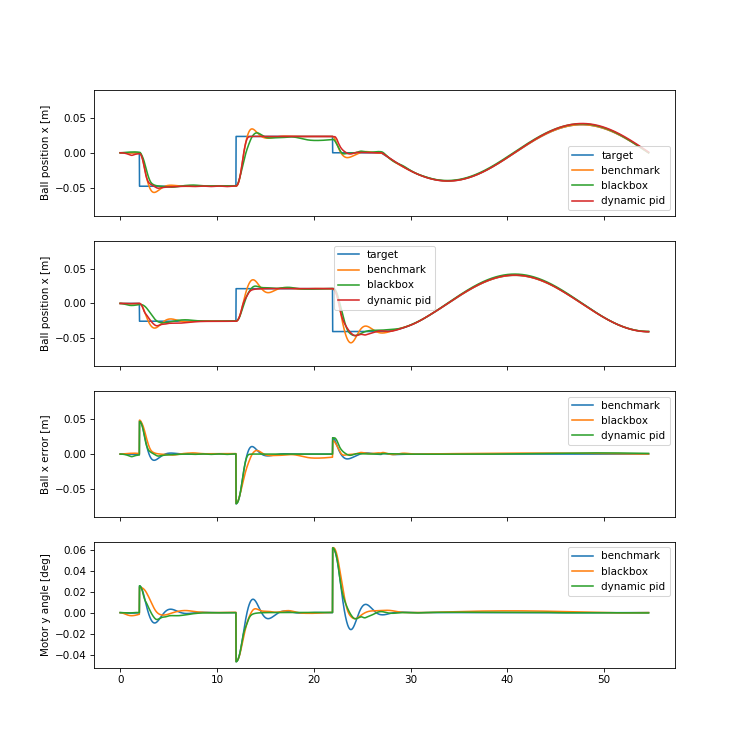

In [27]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t_test, test_trajectory[0, :], label='target')
axs[0].plot(t_test, benchmark_trajectory[0, :], label='benchmark')
axs[0].plot(t_test, blackbox_trajectory[0, :], label='blackbox')
axs[0].plot(t_test,dynpid_trajectory[0, :], label='dynamic pid')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t_test, test_trajectory[1, :], label='target')
axs[1].plot(t_test, benchmark_trajectory[1, :], label='benchmark')
axs[1].plot(t_test, blackbox_trajectory[1, :], label='blackbox')
axs[1].plot(t_test,dynpid_trajectory[1, :], label='dynamic pid')
axs[1].set_ylabel('Ball position x [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t_test, benchmark_error[0, :], label='benchmark')
axs[2].plot(t_test, blackbox_error[0, :], label='blackbox')
axs[2].plot(t_test,dynpid_error[0, :], label='dynamic pid')
axs[2].set_ylabel('Ball x error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t_test, benchmark_error[1, :], label='benchmark')
axs[3].plot(t_test, blackbox_error[1, :], label='blackbox')
axs[3].plot(t_test,dynpid_error[1, :], label='dynamic pid')
axs[3].set_ylabel('Motor y angle [deg]')
axs[3].legend()

plt.show()